In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch import transpose
import random

In [2]:
seed_number = 42
torch.manual_seed(seed_number)
np.random.seed(seed_number)
random.seed(seed_number)

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform)
test_set = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

170499072it [00:12, 14157575.06it/s]                               
Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


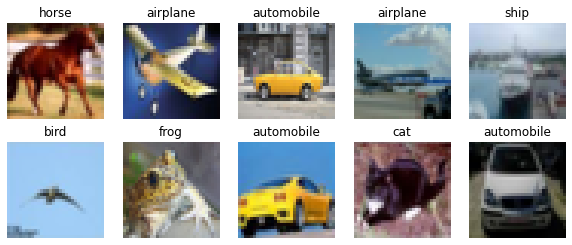

In [6]:
show_multiple_images(train_set)

In [22]:
train_loader = DataLoader(dataset = train_set, batch_size = 50, shuffle = True, num_workers = 2)
test_loader = DataLoader(dataset = test_set, batch_size = 50, shuffle = False, num_workers = 2)

In [23]:
temp_img, temp_label = iter(train_loader).next()
type(temp_img)

torch.Tensor

In [24]:
len(train_loader)

1000

In [25]:
temp_img.size()[0]

50

In [8]:
_, label = iter(train_loader).next()
unique, counts = np.unique(label, return_counts = True)
result = list(zip(unique, counts))
for elem in result :
    print('class.{0} : {1}'.format(elem[0], elem[1]))

class.0 : 16
class.1 : 18
class.2 : 25
class.3 : 18
class.4 : 14
class.5 : 28
class.6 : 20
class.7 : 13
class.8 : 16
class.9 : 32


In [15]:
def show_image(image, label) :
    image = image*(0.5) + 0.5
    np_image = image.numpy()
    # Transpose dimensionality
    np_image = np.transpose(np_image, (1, 2, 0))
    label_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    plt.imshow(np_image)
    plt.axis('off')
    plt.title(label_map[int(label.item())])
    plt.show()

In [27]:
temp_img[0].shape

torch.Size([3, 32, 32])

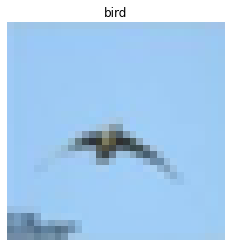

In [28]:
show_image(temp_img[5], temp_label[5])

In [12]:
unique, counts = np.unique(temp_label, return_counts = True)

In [6]:
def check_balance(dataset) :
    loader = DataLoader(dataset = dataset, batch_size = len(dataset), num_workers = 4)
    _, label = iter(loader).next()
    unique, counts = np.unique(label, return_counts = True)
    result = list(zip(unique, counts))
    for elem in result :
        print('class.{0} : {1}'.format(elem[0], elem[1]))

In [16]:
check_balance(train_set)

class.0 : 5000
class.1 : 5000
class.2 : 5000
class.3 : 5000
class.4 : 5000
class.5 : 5000
class.6 : 5000
class.7 : 5000
class.8 : 5000
class.9 : 5000


In [17]:
check_balance(test_set)

class.0 : 1000
class.1 : 1000
class.2 : 1000
class.3 : 1000
class.4 : 1000
class.5 : 1000
class.6 : 1000
class.7 : 1000
class.8 : 1000
class.9 : 1000


In [29]:
class conv_net(nn.Module) :
    def __init__(self) :
        super(conv_net, self).__init__()
        self.conv1 = nn.Conv2d(3, 36, 3, padding = 1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(36, 64, 3, padding = 1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3, padding = 0)
        self.pool3 = nn.MaxPool2d(2, 2)
        # dropout
        self.dropout1 = nn.Dropout(0.5)
        self.dropout2 = nn.Dropout(0.5)
        self.dropout3 = nn.Dropout(0.5)
        self.dropout4 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(128*3*3, 276)
        self.fc2 = nn.Linear(276, 84)
        self.fc3 = nn.Linear(84, 10)
        # batch-normalization
        self.batch1 = nn.BatchNorm1d(num_features = 276)
        self.batch2 = nn.BatchNorm1d(num_features = 84)
        # weight initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        self.optimizer = optim.Adam(self.parameters(), lr = 0.0010)
        self.loss = nn.CrossEntropyLoss()
        
    def forward(self, x) :
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 128*3*3)
        x = self.dropout3(x)
        x = F.relu(self.batch1(self.fc1(x)))
        x = F.relu(self.batch2(self.fc2(x)))
        x = self.dropout4(x)
        x = F.relu(self.fc3(x))
        return x

In [ ]:
model = conv_net()
model

conv_net(
  (conv1): Conv2d(3, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 24, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(24, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=576, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=125, bias=True)
  (fc3): Linear(in_features=125, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (loss): CrossEntropyLoss()
)

In [8]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

def train_eval_model(model, epoch) :

    train_loss_history = []
    valid_loss_history = []
    train_acc_history = []
    valid_acc_history = []
    
    scheduler = ReduceLROnPlateau(model.optimizer, 'min', patience = 1, factor = 0.9)

    for i in range(epoch) :

        train_loss, valid_loss = 0.0, 0.0
        train_acc, valid_acc = 0.0, 0.0

        for train_data, train_target in train_loader :

            model.train()

            model.optimizer.zero_grad()

            train_output = model.forward(train_data)
            t_loss = model.loss(train_output, train_target)
            t_loss.backward()
            model.optimizer.step()

            _, pred = torch.max(train_output, dim = 1)

            train_loss += t_loss.item()
            train_acc += torch.sum(pred == train_target.data)

        with torch.no_grad() :

            for valid_data, valid_target in test_loader :

                model.eval()

                valid_output = model.forward(valid_data)

                v_loss = model.loss(valid_output, valid_target)

                _, v_pred = torch.max(valid_output, dim = 1)

                valid_loss += v_loss.item()
                valid_acc += torch.sum(v_pred == valid_target.data)

        curr_lr = model.optimizer.param_groups[0]['lr']
        scheduler.step(float(valid_loss))

        avg_train_loss = train_loss/len(train_loader)
        train_loss_history.append(float(avg_train_loss))

        avg_valid_loss = valid_loss/len(test_loader)
        valid_loss_history.append(float(avg_valid_loss))

        avg_train_acc = train_acc/len(train_loader)
        train_acc_history.append(float(avg_train_acc))

        avg_valid_acc = valid_acc/len(test_loader)
        valid_acc_history.append(float(avg_valid_acc))

        if i%2==0:
            print('epoch.{0:3d} \t train_ls : {1:.6f} \t train_ac : {2:.4f}% \t valid_ls : {3:.6f} \t valid_ac : {4:.4f}% \t lr : {5:.5f}'.format(i+1, avg_train_loss, avg_train_acc, avg_valid_loss, avg_valid_acc, curr_lr))
            
    return train_loss_history, valid_loss_history, train_acc_history, valid_acc_history

In [9]:
def plot_train_valid(train, valid, loss = True) :
    
    type = None
    if loss:
        type = 'loss'
    else :
        type = 'accuracy'
        
    plt.plot(train, label = "training {}".format(type))
    plt.plot(valid, label = "validation {}".format(type))
    plt.legend()
    plt.title('training {0} with validation {0}'.format(type))

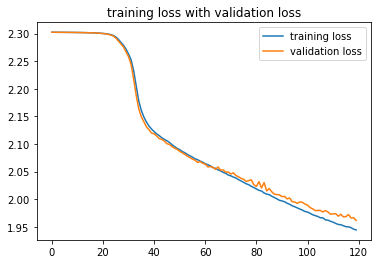

In [ ]:
plot_train_valid(train_loss_history, valid_loss_history, loss = True)

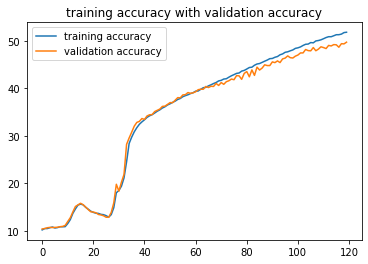

In [ ]:
plot_train_valid(train_acc_history, valid_acc_history, loss = False)

SGD Optimizer with momentum = 0.9

no learning scheduler

no weight decay

no dropout

batch size = 100

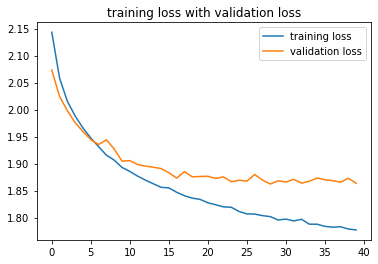

In [ ]:
plot_train_valid(train_loss_history, valid_loss_history, loss = True)

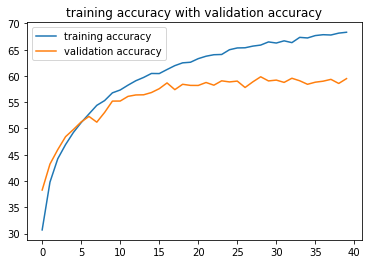

In [ ]:
plot_train_valid(train_acc_history, valid_acc_history, loss = False)

Adam Optimizer with momentum = 0.9

no learning scheduler

no weight decay

no dropout

batch size = 100

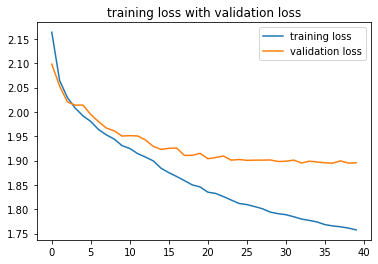

In [ ]:
plot_train_valid(train_loss_history, valid_loss_history, loss = True)

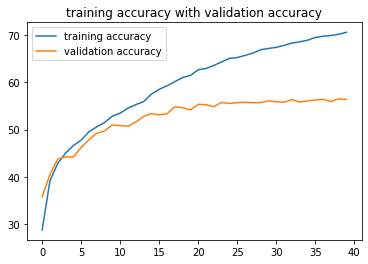

In [ ]:
plot_train_valid(train_acc_history, valid_acc_history, loss = False)

Optimizer : Adam with momentum = 0.9

Learning scheduler : ReduceLROnPlateau with patience = 1, factor = 0.9

no weight decay

no dropout

batch size = 100

In [10]:
def plot_train_valid(train_loss, valid_loss, train_acc, valid_acc, str_title = None, model = None) :
    
    fig = plt.figure(figsize = (15, 6))
    if str_title :
        fig.suptitle(str_title, fontsize = 18)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    ax1.plot(train_loss, label = "training loss")
    ax1.plot(valid_loss, label = "validation loss")
    ax1.legend()
    ax1.set_title('Loss')
    
    ax2.plot(train_acc, label = "training accuracy")
    ax2.plot(valid_acc, label = "validation accuracy")
    ax2.axvline(valid_acc.index(max(valid_acc)), color = 'b', linestyle = '--', linewidth = 2)
    ax2.text(valid_acc.index(max(valid_acc)), max(valid_acc), '{:.2f}'.format(max(valid_acc))+'%', color='k', horizontalalignment = 'left',verticalalignment='bottom')
    ax2.legend()
    ax2.set_title('Score')
    
    plt.show()
    
    if model :
        print(model)

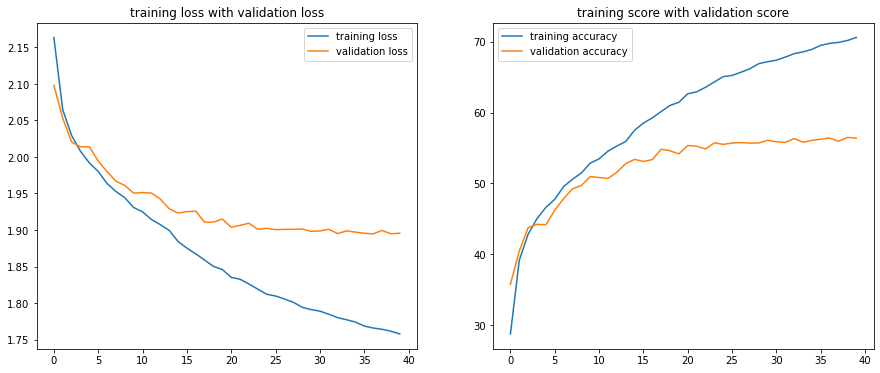

In [ ]:
plot_train_valid(train_loss_history, valid_loss_history, train_acc_history, valid_acc_history)

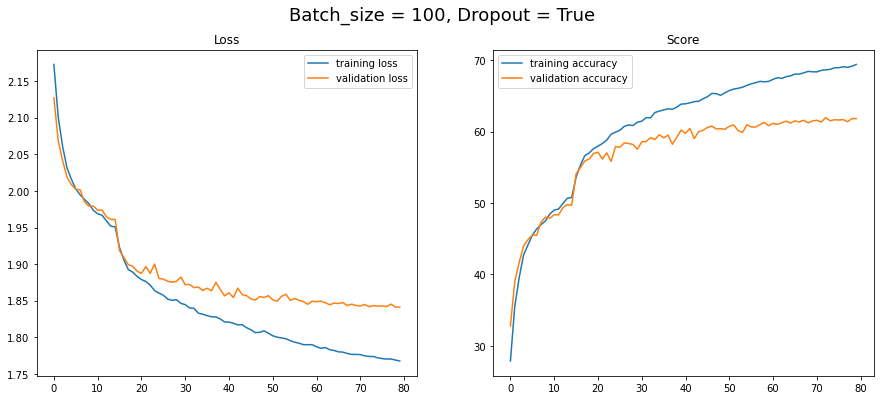

In [ ]:
plot_train_valid(train_loss_history, valid_loss_history, train_acc_history, valid_acc_history, str_title = 'Batch_size = 100, Dropout = True')
# Batch size = 100, loss = log_softmax
# Dropout in first fully-connected-layer (0.25)
# Learning scheduler is ReduceLROnPlateau (patience = 1, factor = 0.9)

In [ ]:
tr_ls, tr_ac, vl_ls, vl_ac = train_eval_model(model, epoch = 50)

epoch.  1 	 train_ls : 1.714011 	 train_ac : 36.6020% 	 valid_ls : 1.374033 	 valid_ac : 50.4000% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.182802 	 train_ac : 57.9320% 	 valid_ls : 1.070797 	 valid_ac : 62.3100% 	 lr : 0.00100
epoch.  5 	 train_ls : 0.995671 	 train_ac : 64.7300% 	 valid_ls : 0.978484 	 valid_ac : 65.1400% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.873536 	 train_ac : 69.3460% 	 valid_ls : 0.890845 	 valid_ac : 69.5700% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.782005 	 train_ac : 72.5940% 	 valid_ls : 0.837514 	 valid_ac : 70.7900% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.710176 	 train_ac : 75.0060% 	 valid_ls : 0.833490 	 valid_ac : 71.3500% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.657787 	 train_ac : 76.9280% 	 valid_ls : 0.821964 	 valid_ac : 72.1100% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.609736 	 train_ac : 78.5500% 	 valid_ls : 0.830965 	 valid_ac : 72.1700% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.552987 	 train_ac : 80.3240% 	 valid_ls : 0.877176 	 valid_ac : 71.2300

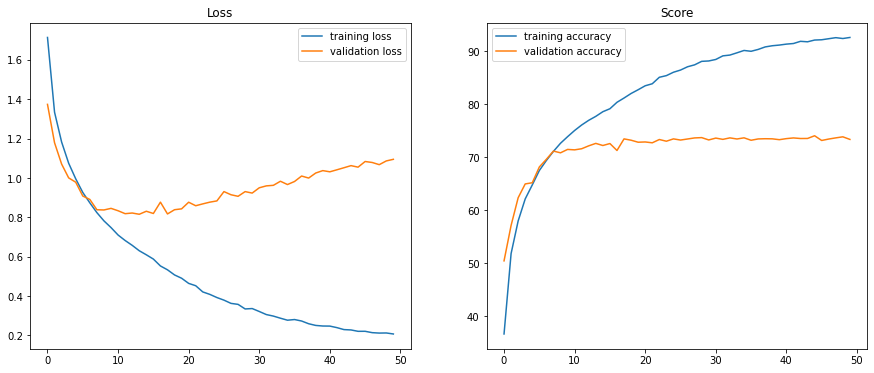

In [ ]:
plot_train_valid(tr_ls, tr_ac, vl_ls, vl_ac)
# Batch size = 100, loss = log_softmax
# Dropout before first fully-connected-layer and third fully-connected-layer (0.2/0.3)
# Learning scheduler is ReduceLROnPlateau (patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer

In [11]:
torch.cuda.is_available()

True

In [12]:
device = torch.device('cuda')
device

device(type='cuda')

In [13]:
print(torch.cuda.get_device_name(0))

GeForce GTX 1060 3GB


In [14]:
model2 = conv_net()
model2 = model2.to(device)

In [15]:
def train_eval_model_gpu(model, epoch, device, train_loader, test_loader) :

    train_loss_history = []
    valid_loss_history = []
    train_acc_history = []
    valid_acc_history = []
    
    scheduler = ReduceLROnPlateau(model.optimizer, 'min', patience = 1, factor = 0.9)

    for i in range(epoch) :

        train_loss, valid_loss = 0.0, 0.0
        train_acc, valid_acc = 0.0, 0.0

        for train_data, train_target in train_loader :
            train_data, train_target = train_data.to(device), train_target.to(device)

            model.train()

            model.optimizer.zero_grad()

            train_output = model.forward(train_data)
            t_loss = model.loss(train_output, train_target)
            t_loss.backward()
            model.optimizer.step()

            _, pred = torch.max(train_output, dim = 1)

            train_loss += t_loss.item()
            train_acc += torch.sum(pred == train_target.data)

        with torch.no_grad() :

            for valid_data, valid_target in test_loader :
                valid_data, valid_target = valid_data.to(device), valid_target.to(device)

                model.eval()

                valid_output = model.forward(valid_data)

                v_loss = model.loss(valid_output, valid_target)

                _, v_pred = torch.max(valid_output, dim = 1)

                valid_loss += v_loss.item()
                valid_acc += torch.sum(v_pred == valid_target.data)

        train_acc = train_acc*(100/train_data.size()[0])
        valid_acc = valid_acc*(100/valid_data.size()[0])

        curr_lr = model.optimizer.param_groups[0]['lr']
        scheduler.step(float(valid_loss))

        avg_train_loss = train_loss/len(train_loader)
        train_loss_history.append(float(avg_train_loss))

        avg_valid_loss = valid_loss/len(test_loader)
        valid_loss_history.append(float(avg_valid_loss))

        avg_train_acc = train_acc/len(train_loader)
        train_acc_history.append(float(avg_train_acc))

        avg_valid_acc = valid_acc/len(test_loader)
        valid_acc_history.append(float(avg_valid_acc))

        if i%2==0:
            print('epoch.{0:3d} \t train_ls : {1:.6f} \t train_ac : {2:.4f}% \t valid_ls : {3:.6f} \t valid_ac : {4:.4f}% \t lr : {5:.5f}'.format(i+1, avg_train_loss, avg_train_acc, avg_valid_loss, avg_valid_acc, curr_lr))        
    ret = []
    ret.append(train_loss_history)
    ret.append(valid_loss_history)
    ret.append(train_acc_history)
    ret.append(valid_acc_history)
    return ret

In [ ]:
dropout_0_5 = train_eval_model_gpu(model2, 50, device)

epoch.  1 	 train_ls : 1.784667 	 train_ac : 33.3120% 	 valid_ls : 1.450801 	 valid_ac : 46.2800% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.331835 	 train_ac : 51.7720% 	 valid_ls : 1.164729 	 valid_ac : 58.0400% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.179674 	 train_ac : 57.8440% 	 valid_ls : 1.041210 	 valid_ac : 63.8500% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.082197 	 train_ac : 61.9820% 	 valid_ls : 0.981701 	 valid_ac : 65.9900% 	 lr : 0.00100
epoch.  9 	 train_ls : 1.013788 	 train_ac : 64.7340% 	 valid_ls : 0.916079 	 valid_ac : 68.0700% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.961247 	 train_ac : 66.3580% 	 valid_ls : 0.893752 	 valid_ac : 69.0300% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.930484 	 train_ac : 67.5020% 	 valid_ls : 0.850100 	 valid_ac : 70.6600% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.895868 	 train_ac : 68.7420% 	 valid_ls : 0.836606 	 valid_ac : 70.8100% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.860074 	 train_ac : 69.9820% 	 valid_ls : 0.816418 	 valid_ac : 72.0400

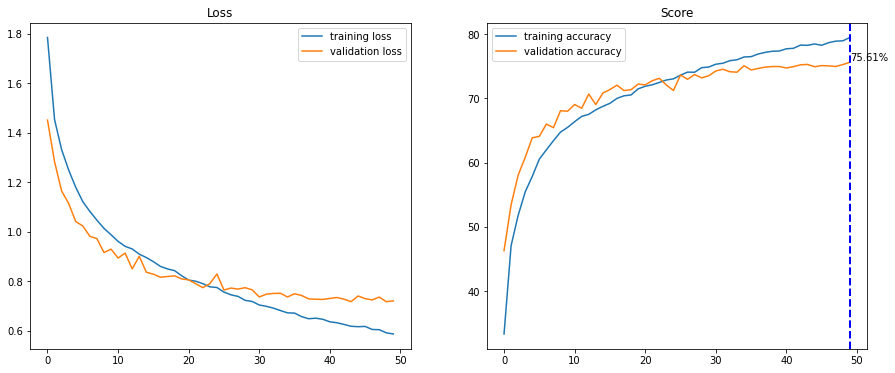

In [ ]:
plot_train_valid(dropout_0_5[0], dropout_0_5[1], dropout_0_5[2], dropout_0_5[3])
# Batch size = 100, loss = crossentropy
# Dropout before first fully-connected-layer and third fully-connected-layer (0.5/0.5)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer

In [ ]:
dropout_0_5_2 = train_eval_model_gpu(model2, 30, device)

epoch.  1 	 train_ls : 0.584203 	 train_ac : 79.5500% 	 valid_ls : 0.719247 	 valid_ac : 75.6800% 	 lr : 0.00035
epoch.  3 	 train_ls : 0.576145 	 train_ac : 79.8380% 	 valid_ls : 0.724199 	 valid_ac : 75.2800% 	 lr : 0.00035
epoch.  5 	 train_ls : 0.566065 	 train_ac : 80.1420% 	 valid_ls : 0.718514 	 valid_ac : 75.5200% 	 lr : 0.00031
epoch.  7 	 train_ls : 0.566274 	 train_ac : 80.1340% 	 valid_ls : 0.716849 	 valid_ac : 75.5700% 	 lr : 0.00031
epoch.  9 	 train_ls : 0.557032 	 train_ac : 80.2360% 	 valid_ls : 0.722607 	 valid_ac : 75.4200% 	 lr : 0.00031
epoch. 11 	 train_ls : 0.552099 	 train_ac : 80.6140% 	 valid_ls : 0.719686 	 valid_ac : 75.6700% 	 lr : 0.00028
epoch. 13 	 train_ls : 0.537831 	 train_ac : 81.1800% 	 valid_ls : 0.730486 	 valid_ac : 75.2800% 	 lr : 0.00025
epoch. 15 	 train_ls : 0.535816 	 train_ac : 81.2320% 	 valid_ls : 0.717851 	 valid_ac : 75.5800% 	 lr : 0.00023
epoch. 17 	 train_ls : 0.524560 	 train_ac : 81.3500% 	 valid_ls : 0.722310 	 valid_ac : 75.4700

In [ ]:
model3 = conv_net()
model3 = model3.to(device)

In [ ]:
w_decay = train_eval_model_gpu(model3, 50, device)

epoch.  1 	 train_ls : 1.831441 	 train_ac : 31.9800% 	 valid_ls : 1.440431 	 valid_ac : 48.4600% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.263988 	 train_ac : 55.4680% 	 valid_ls : 1.125598 	 valid_ac : 61.1500% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.079327 	 train_ac : 63.1140% 	 valid_ls : 0.945864 	 valid_ac : 66.6800% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.981722 	 train_ac : 66.5480% 	 valid_ls : 0.850283 	 valid_ac : 70.2600% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.918896 	 train_ac : 69.1140% 	 valid_ls : 0.817661 	 valid_ac : 71.9500% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.864239 	 train_ac : 70.8520% 	 valid_ls : 0.760171 	 valid_ac : 73.7900% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.828203 	 train_ac : 72.4120% 	 valid_ls : 0.805552 	 valid_ac : 72.4100% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.792413 	 train_ac : 73.6220% 	 valid_ls : 0.737545 	 valid_ac : 74.6200% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.761570 	 train_ac : 74.5480% 	 valid_ls : 0.711956 	 valid_ac : 75.6200

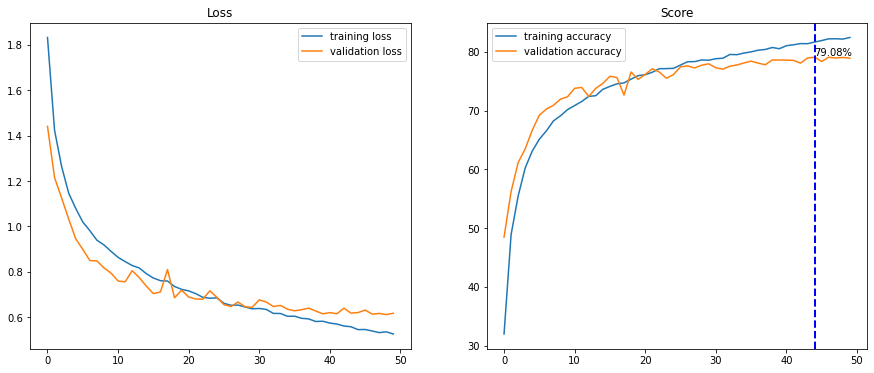

In [ ]:
plot_train_valid(w_decay[0], w_decay[1], w_decay[2], w_decay[3])

In [ ]:
conv_layer_3 = train_eval_model_gpu(model3, 70, device)

epoch.  1 	 train_ls : 1.833739 	 train_ac : 31.5400% 	 valid_ls : 1.417455 	 valid_ac : 47.8700% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.312216 	 train_ac : 52.7440% 	 valid_ls : 1.138414 	 valid_ac : 60.2700% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.149870 	 train_ac : 59.9720% 	 valid_ls : 1.030857 	 valid_ac : 63.9400% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.065797 	 train_ac : 63.0060% 	 valid_ls : 0.927288 	 valid_ac : 68.1600% 	 lr : 0.00100
epoch.  9 	 train_ls : 1.010644 	 train_ac : 65.1760% 	 valid_ls : 0.913755 	 valid_ac : 67.7800% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.961654 	 train_ac : 66.8480% 	 valid_ls : 0.838316 	 valid_ac : 70.6100% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.938882 	 train_ac : 67.9560% 	 valid_ls : 0.822297 	 valid_ac : 71.4500% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.918578 	 train_ac : 68.6480% 	 valid_ls : 0.831444 	 valid_ac : 71.4400% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.879057 	 train_ac : 70.2480% 	 valid_ls : 0.777811 	 valid_ac : 73.2000

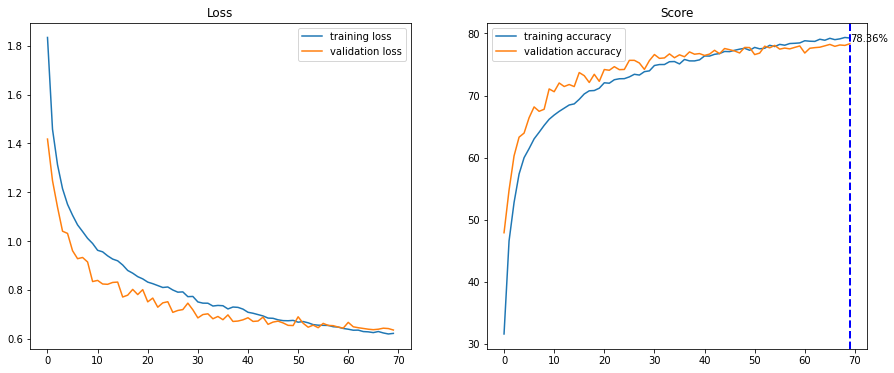

In [ ]:
plot_train_valid(conv_layer_3[0], conv_layer_3[1], conv_layer_3[2], conv_layer_3[3])

In [ ]:
conv_layer_3_2 = train_eval_model_gpu(model3, 20, device)

epoch.  1 	 train_ls : 0.619549 	 train_ac : 79.3200% 	 valid_ls : 0.633516 	 valid_ac : 78.1900% 	 lr : 0.00019
epoch.  3 	 train_ls : 0.619944 	 train_ac : 79.2800% 	 valid_ls : 0.631429 	 valid_ac : 78.3100% 	 lr : 0.00019
epoch.  5 	 train_ls : 0.606509 	 train_ac : 79.8420% 	 valid_ls : 0.645738 	 valid_ac : 77.9700% 	 lr : 0.00019
epoch.  7 	 train_ls : 0.608686 	 train_ac : 79.5880% 	 valid_ls : 0.633715 	 valid_ac : 78.2900% 	 lr : 0.00017
epoch.  9 	 train_ls : 0.600414 	 train_ac : 79.9940% 	 valid_ls : 0.635938 	 valid_ac : 78.0000% 	 lr : 0.00015
epoch. 11 	 train_ls : 0.599780 	 train_ac : 80.1100% 	 valid_ls : 0.625785 	 valid_ac : 78.5000% 	 lr : 0.00014
epoch. 13 	 train_ls : 0.594103 	 train_ac : 80.2940% 	 valid_ls : 0.638072 	 valid_ac : 78.1500% 	 lr : 0.00014
epoch. 15 	 train_ls : 0.587544 	 train_ac : 80.3860% 	 valid_ls : 0.628789 	 valid_ac : 78.7700% 	 lr : 0.00012
epoch. 17 	 train_ls : 0.586788 	 train_ac : 80.4300% 	 valid_ls : 0.623259 	 valid_ac : 78.7100

In [ ]:
model5 = conv_net()
model5 = model5.to(device)
model5

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.4, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=756, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=156, bias=True)
  (fc3): Linear(in_features=156, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (loss): CrossEntropyLoss()
)

In [ ]:
test_5 = train_eval_model_gpu(model5, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.897027 	 train_ac : 28.6000% 	 valid_ls : 1.501343 	 valid_ac : 44.0300% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.321048 	 train_ac : 52.0120% 	 valid_ls : 1.146095 	 valid_ac : 58.1000% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.145083 	 train_ac : 58.8980% 	 valid_ls : 1.001635 	 valid_ac : 64.4300% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.055384 	 train_ac : 62.7280% 	 valid_ls : 0.930897 	 valid_ac : 67.5700% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.977818 	 train_ac : 65.6440% 	 valid_ls : 0.872736 	 valid_ac : 69.8400% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.926852 	 train_ac : 67.5220% 	 valid_ls : 0.811113 	 valid_ac : 72.1900% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.886131 	 train_ac : 68.9640% 	 valid_ls : 0.785194 	 valid_ac : 72.7000% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.854748 	 train_ac : 70.2320% 	 valid_ls : 0.767420 	 valid_ac : 72.8200% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.836395 	 train_ac : 71.0040% 	 valid_ls : 0.733251 	 valid_ac : 74.3200

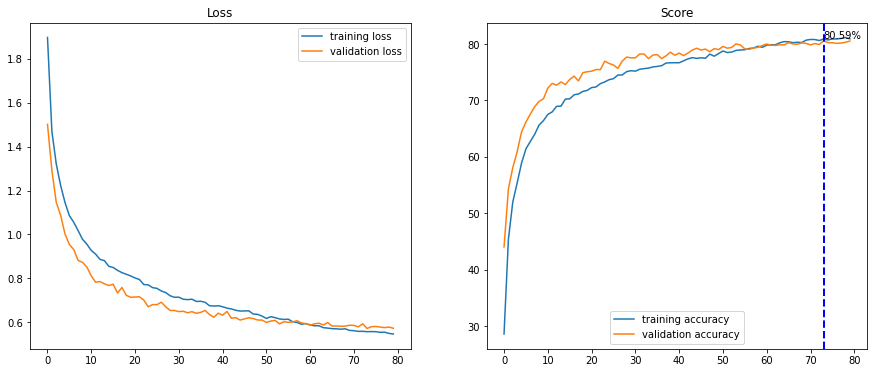

In [ ]:
plot_train_valid(test_5[0] ,test_5[1], test_5[2], test_5[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.4/0.3)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.001
# No batch-normalization

In [ ]:
model6 = conv_net()
model6 = model6.to(device)
model6

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.4, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=756, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=156, bias=True)
  (fc3): Linear(in_features=156, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (loss): CrossEntropyLoss()
)

In [ ]:
test_6 = train_eval_model_gpu(model6, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.758628 	 train_ac : 35.1400% 	 valid_ls : 1.357380 	 valid_ac : 51.2000% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.214871 	 train_ac : 56.5160% 	 valid_ls : 1.056999 	 valid_ac : 62.8300% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.076110 	 train_ac : 62.2180% 	 valid_ls : 0.988739 	 valid_ac : 65.7100% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.007456 	 train_ac : 64.7700% 	 valid_ls : 0.854838 	 valid_ac : 70.4800% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.963846 	 train_ac : 66.5740% 	 valid_ls : 0.847925 	 valid_ac : 69.9700% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.934014 	 train_ac : 67.4260% 	 valid_ls : 0.811048 	 valid_ac : 71.3300% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.905361 	 train_ac : 68.6060% 	 valid_ls : 0.794534 	 valid_ac : 72.8700% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.890035 	 train_ac : 69.1980% 	 valid_ls : 0.777454 	 valid_ac : 73.7200% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.873987 	 train_ac : 69.9540% 	 valid_ls : 0.780415 	 valid_ac : 72.2300

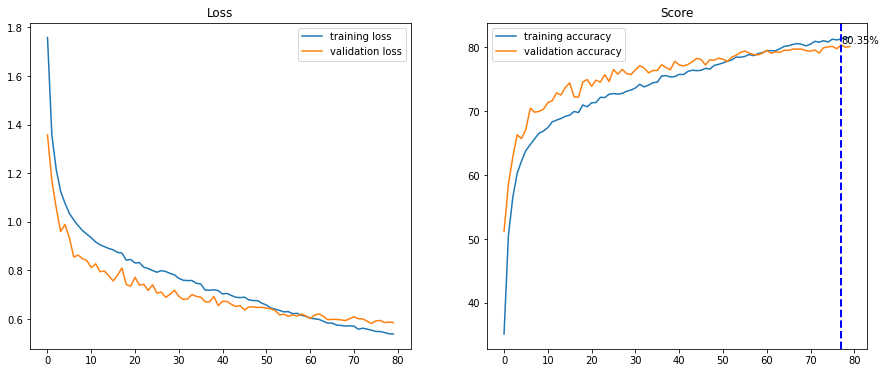

In [ ]:
plot_train_valid(test_6[0] ,test_6[1], test_6[2], test_6[3])
# Batch size = 50, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.4/0.3)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.001

In [ ]:
model7 = conv_net()
model7 = model7.to(device)
model7

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.4, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=756, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=156, bias=True)
  (fc3): Linear(in_features=156, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm2d(64, eps=1e-05, momentum=0

In [ ]:
test_7 = train_eval_model_gpu(model7, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.843537 	 train_ac : 30.8120% 	 valid_ls : 1.363190 	 valid_ac : 49.7600% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.236402 	 train_ac : 55.5480% 	 valid_ls : 1.069393 	 valid_ac : 62.0800% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.086349 	 train_ac : 61.4360% 	 valid_ls : 0.957103 	 valid_ac : 66.3100% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.999645 	 train_ac : 64.9760% 	 valid_ls : 0.914425 	 valid_ac : 67.1300% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.943523 	 train_ac : 66.9240% 	 valid_ls : 0.827344 	 valid_ac : 71.2100% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.912636 	 train_ac : 68.1460% 	 valid_ls : 0.827519 	 valid_ac : 71.2300% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.866007 	 train_ac : 69.7880% 	 valid_ls : 0.759591 	 valid_ac : 73.8200% 	 lr : 0.00090
epoch. 15 	 train_ls : 0.845204 	 train_ac : 70.4160% 	 valid_ls : 0.743479 	 valid_ac : 74.3900% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.826384 	 train_ac : 71.3680% 	 valid_ls : 0.763746 	 valid_ac : 73.3800

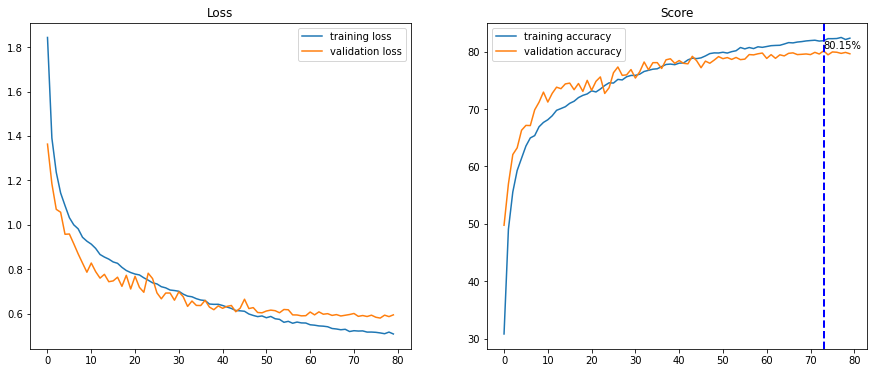

In [ ]:
plot_train_valid(test_7[0] ,test_7[1], test_7[2], test_7[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.4/0.3)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.001
# Batch normalization after first, second convolutional-layer

In [ ]:
model8 = conv_net()
model8 = model8.to(device)
model8

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.4, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=756, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=156, bias=True)
  (fc3): Linear(in_features=156, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(276, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(156, eps=1e-05, momentum

In [ ]:
test_8 = train_eval_model_gpu(model8, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.982032 	 train_ac : 26.6500% 	 valid_ls : 1.438178 	 valid_ac : 46.9800% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.193674 	 train_ac : 57.1600% 	 valid_ls : 1.016770 	 valid_ac : 64.3500% 	 lr : 0.00100
epoch.  5 	 train_ls : 0.988850 	 train_ac : 65.2560% 	 valid_ls : 0.852460 	 valid_ac : 69.9000% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.898704 	 train_ac : 68.5320% 	 valid_ls : 0.779998 	 valid_ac : 72.7700% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.837512 	 train_ac : 70.8760% 	 valid_ls : 0.850868 	 valid_ac : 70.8000% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.804818 	 train_ac : 72.0840% 	 valid_ls : 0.747294 	 valid_ac : 74.2800% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.769837 	 train_ac : 73.4680% 	 valid_ls : 0.709516 	 valid_ac : 75.1300% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.747901 	 train_ac : 74.3100% 	 valid_ls : 0.683051 	 valid_ac : 76.4700% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.727692 	 train_ac : 74.8840% 	 valid_ls : 0.672347 	 valid_ac : 76.9700

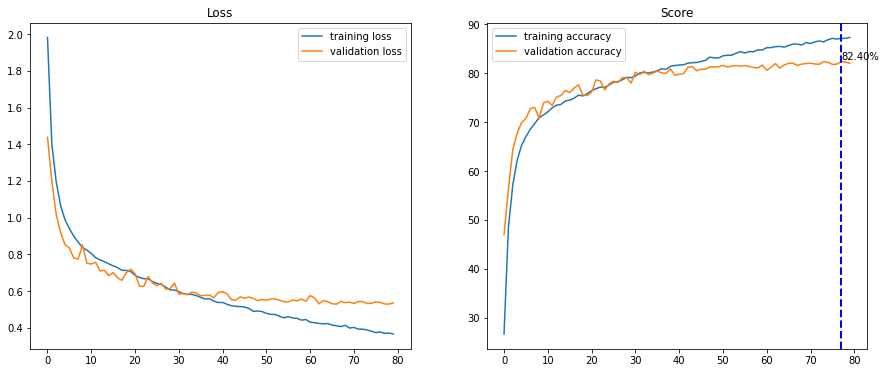

In [ ]:
plot_train_valid(test_8[0] ,test_8[1], test_8[2], test_8[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.4/0.3)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.001
# Batch normalization after first, second fully-connected-layer
# Batch normalization을 사용하지 않은 것과 비교하여, training, evaluation 모두에서 수렴을 더 빨리하고, computaional loss도 줄일 수 있다.

In [ ]:
model9 = conv_net()
model9 = model9.to(device)
model9

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=756, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=156, bias=True)
  (fc3): Linear(in_features=156, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(276, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(156, eps=1e-05, momentum

In [ ]:
test_9 = train_eval_model_gpu(model9, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.976483 	 train_ac : 26.8540% 	 valid_ls : 1.523641 	 valid_ac : 44.6900% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.231097 	 train_ac : 55.6880% 	 valid_ls : 1.080697 	 valid_ac : 61.6600% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.027487 	 train_ac : 63.8160% 	 valid_ls : 0.923653 	 valid_ac : 67.1000% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.933990 	 train_ac : 67.6320% 	 valid_ls : 0.869576 	 valid_ac : 70.1700% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.876579 	 train_ac : 69.8900% 	 valid_ls : 0.767544 	 valid_ac : 73.3900% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.827309 	 train_ac : 71.5360% 	 valid_ls : 0.731301 	 valid_ac : 75.2300% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.794014 	 train_ac : 72.6360% 	 valid_ls : 0.731237 	 valid_ac : 75.0200% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.757769 	 train_ac : 74.2040% 	 valid_ls : 0.718783 	 valid_ac : 75.0100% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.733616 	 train_ac : 75.1860% 	 valid_ls : 0.699937 	 valid_ac : 76.4200

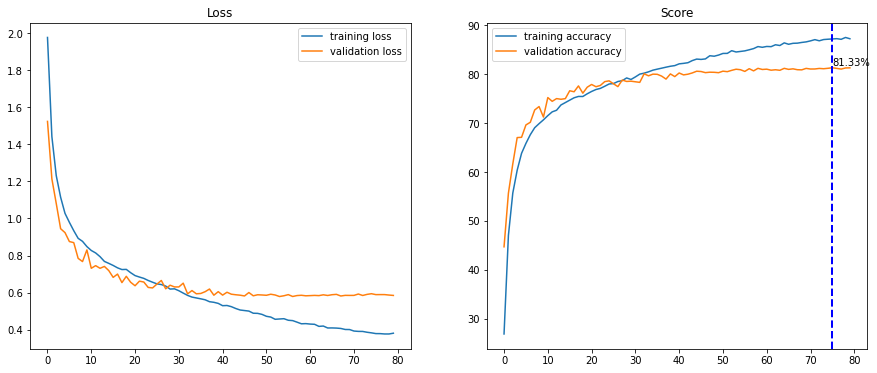

In [ ]:
plot_train_valid(test_9[0] ,test_9[1], test_9[2], test_9[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.5/0.5)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.001
# Batch normalization after first, second and third fully-connected-layer

In [ ]:
model10 = conv_net()
model10 = model10.to(device)
model10

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.4, inplace=False)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=756, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=156, bias=True)
  (fc3): Linear(in_features=156, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(276, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(156, eps=1e-05, momentum

In [ ]:
test_10 = train_eval_model_gpu(model10, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.923063 	 train_ac : 31.0760% 	 valid_ls : 1.494128 	 valid_ac : 49.1000% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.161172 	 train_ac : 58.5240% 	 valid_ls : 0.992743 	 valid_ac : 65.4200% 	 lr : 0.00100
epoch.  5 	 train_ls : 0.974339 	 train_ac : 66.2960% 	 valid_ls : 0.887925 	 valid_ac : 69.1700% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.890461 	 train_ac : 69.1440% 	 valid_ls : 0.788502 	 valid_ac : 73.0500% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.843470 	 train_ac : 71.0440% 	 valid_ls : 0.745886 	 valid_ac : 74.3800% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.795207 	 train_ac : 72.7620% 	 valid_ls : 0.717382 	 valid_ac : 75.5100% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.774381 	 train_ac : 73.6540% 	 valid_ls : 0.736744 	 valid_ac : 74.6600% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.738032 	 train_ac : 74.7900% 	 valid_ls : 0.690224 	 valid_ac : 76.3800% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.710462 	 train_ac : 75.8660% 	 valid_ls : 0.663587 	 valid_ac : 77.4600

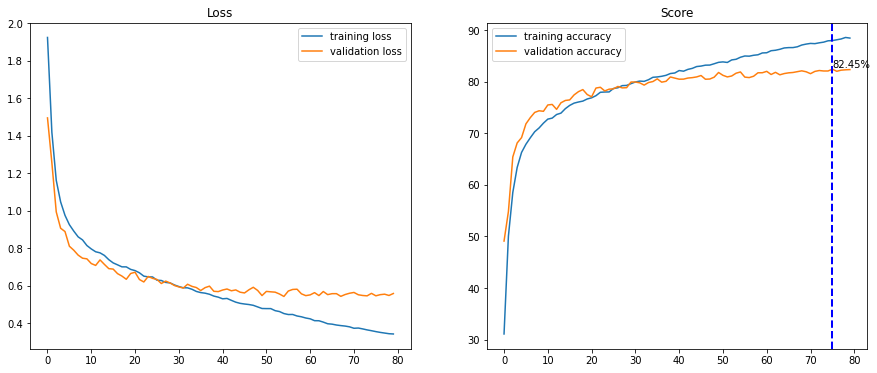

In [ ]:
plot_train_valid(test_10[0] ,test_10[1], test_10[2], test_10[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.4/0.3)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.0015
# Batch normalization after first, second and third fully-connected-layer

In [ ]:
model11 = conv_net()
model11 = model11.to(device)
model11

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.4, inplace=False)
  (fc1): Linear(in_features=756, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): CrossEntropyLoss()
)

In [ ]:
test_11 = train_eval_model_gpu(model11, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.781391 	 train_ac : 35.3560% 	 valid_ls : 1.318434 	 valid_ac : 52.9200% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.089633 	 train_ac : 61.1820% 	 valid_ls : 0.983618 	 valid_ac : 65.1700% 	 lr : 0.00100
epoch.  5 	 train_ls : 0.919697 	 train_ac : 67.6540% 	 valid_ls : 0.860707 	 valid_ac : 69.7100% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.834783 	 train_ac : 70.7980% 	 valid_ls : 0.760419 	 valid_ac : 74.0100% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.790562 	 train_ac : 72.5140% 	 valid_ls : 0.729126 	 valid_ac : 74.2000% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.753554 	 train_ac : 73.6980% 	 valid_ls : 0.695621 	 valid_ac : 75.7900% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.722271 	 train_ac : 74.9080% 	 valid_ls : 0.710639 	 valid_ac : 75.8200% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.698432 	 train_ac : 75.7620% 	 valid_ls : 0.650236 	 valid_ac : 77.8000% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.684416 	 train_ac : 76.1960% 	 valid_ls : 0.655976 	 valid_ac : 77.7400

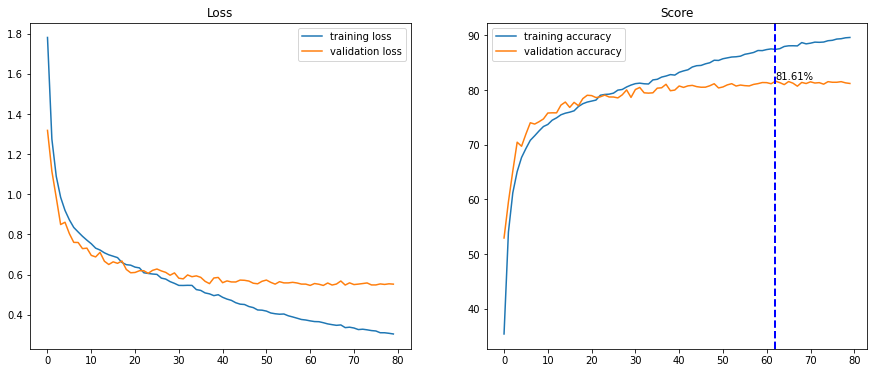

In [ ]:
plot_train_valid(test_11[0] ,test_11[1], test_11[2], test_11[3])
# Batch size = 200, loss = crossentropy
# Dropout before first and second fully-connected-layer (0.5/0.4)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.0015
# Batch normalization after first, second and third fully-connected-layer
# Overffiting을 해결하기 위해 fully-connected-layer을 축소

In [ ]:
model12 = conv_net()
model12 = model12.to(device)
model12

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=756, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): CrossEnt

In [ ]:
test_12 = train_eval_model_gpu(model12, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 2.078561 	 train_ac : 26.3520% 	 valid_ls : 1.512382 	 valid_ac : 47.3300% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.306865 	 train_ac : 54.0700% 	 valid_ls : 1.083954 	 valid_ac : 61.9200% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.087197 	 train_ac : 62.4360% 	 valid_ls : 0.908654 	 valid_ac : 68.4700% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.981588 	 train_ac : 66.6540% 	 valid_ls : 0.865609 	 valid_ac : 69.8800% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.920932 	 train_ac : 69.2280% 	 valid_ls : 0.810592 	 valid_ac : 71.5100% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.883257 	 train_ac : 70.6040% 	 valid_ls : 0.769079 	 valid_ac : 73.9400% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.844050 	 train_ac : 71.8400% 	 valid_ls : 0.727504 	 valid_ac : 74.9300% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.821439 	 train_ac : 72.8140% 	 valid_ls : 0.734176 	 valid_ac : 75.0800% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.788834 	 train_ac : 73.9880% 	 valid_ls : 0.692722 	 valid_ac : 76.3100

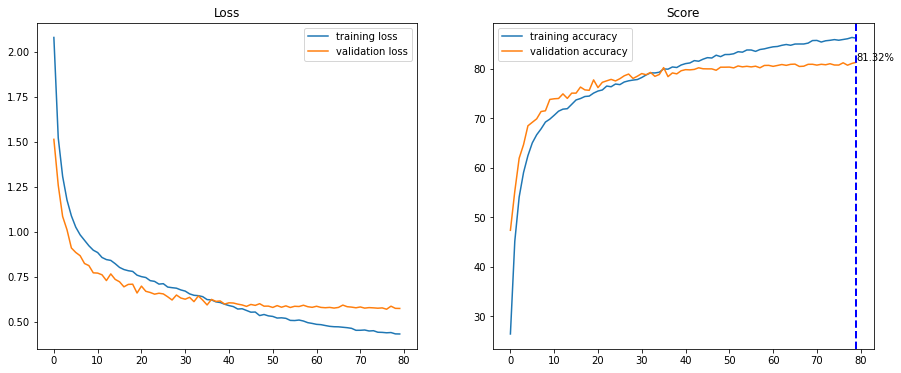

In [ ]:
plot_train_valid(test_12[0] ,test_12[1], test_12[2], test_12[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.5/0.5)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.002
# Batch normalization after first, second and third fully-connected-layer
# Dropout layer를 하나 더 추가하고, weight decay를 0.0015 -> 0.002로 증가함으로써 overfitting의 정도를 줄일 수 있었음.

In [16]:
transform_train = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.RandomVerticalFlip(),
                                    transforms.RandomChoice([
                                        transforms.RandomRotation((10, 30)),
                                        transforms.RandomCrop(32, padding=4)
                                    ]),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [17]:
train_set_aug = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = transform_train)
test_set_aug = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
train_loader_aug = DataLoader(train_set_aug, batch_size = 200, shuffle=True, num_workers=2)
test_loader_aug = DataLoader(test_set_aug, batch_size = 200, shuffle=False, num_workers=2)

In [25]:
image_aug, label_aug = iter(train_loader_aug).next()

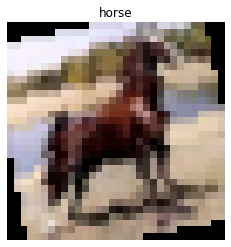

In [26]:
n_index = 123
show_image(image_aug[n_index], label_aug[n_index])

In [ ]:
train_set_origin = torchvision.datasets.CIFAR10(root = './data', train=True, download = True, transform = transform)
print(len(train_set_origin))
print(len(train_set_aug))

Files already downloaded and verified
50000
50000


In [ ]:
train_set_merge = torch.utils.data.ConcatDataset([train_set_origin, train_set_aug])
print(len(train_set_merge))

100000


In [ ]:
train_loader_merge = DataLoader(train_set_merge, batch_size=200, shuffle = True, num_workers=2)

In [ ]:
image_aug, label_aug = iter(train_loader_merge).next()

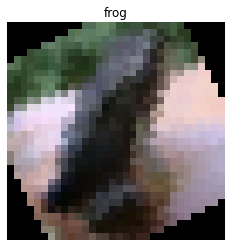

In [ ]:
n_index = 13
show_image(image_aug[n_index], label_aug[n_index])

In [27]:
def show_multiple_images(data) :
    label_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    data_loader = DataLoader(data, batch_size = 10, shuffle = True, num_workers=2)
    image, label = iter(data_loader).next()
    fig = plt.figure(figsize = (10, 4))
    for i in range(10) :
        image[i] = image[i]*(0.5) + 0.5
        np_img = image[i].numpy()
        np_img = np.transpose(np_img, (1, 2, 0))
        ax = fig.add_subplot(2, 5, i+1)
        ax.imshow(np_img)
        ax.set_title(label_map[label[i].item()])
        ax.axis('off')

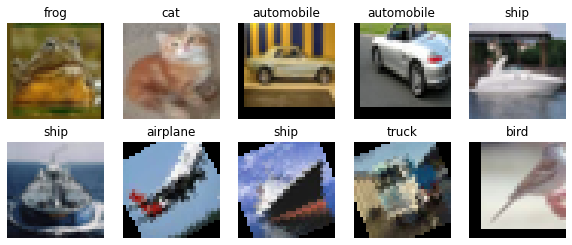

In [ ]:
show_multiple_images(train_set_merge)

In [ ]:
model13 = conv_net()
model13 = model13.to(device)
model13

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=756, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): CrossEntropyLoss()
)

In [ ]:
test_13 = train_eval_model_gpu(model13, 80, device, train_loader_aug, test_loader_aug)

epoch.  1 	 train_ls : 2.202716 	 train_ac : 21.2300% 	 valid_ls : 1.893579 	 valid_ac : 31.8800% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.458125 	 train_ac : 47.5720% 	 valid_ls : 1.318890 	 valid_ac : 53.0100% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.223489 	 train_ac : 57.4020% 	 valid_ls : 1.011188 	 valid_ac : 64.5300% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.113122 	 train_ac : 61.6740% 	 valid_ls : 0.951851 	 valid_ac : 66.7300% 	 lr : 0.00100
epoch.  9 	 train_ls : 1.053194 	 train_ac : 64.0940% 	 valid_ls : 0.860154 	 valid_ac : 69.9900% 	 lr : 0.00100
epoch. 11 	 train_ls : 1.011046 	 train_ac : 65.6820% 	 valid_ls : 0.812496 	 valid_ac : 72.2400% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.970365 	 train_ac : 67.4720% 	 valid_ls : 0.784727 	 valid_ac : 73.0200% 	 lr : 0.00090
epoch. 15 	 train_ls : 0.950761 	 train_ac : 68.4320% 	 valid_ls : 0.852538 	 valid_ac : 70.3900% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.919386 	 train_ac : 69.4400% 	 valid_ls : 0.751194 	 valid_ac : 74.1400

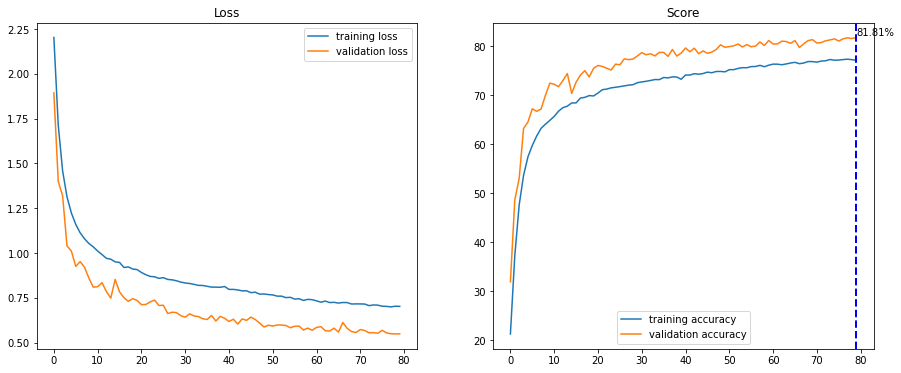

In [ ]:
plot_train_valid(test_13[0] ,test_13[1], test_13[2], test_13[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.5/0.5)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.002
# Batch normalization after first, second and third fully-connected-layer
# RandomCrop, RandomRotation 등을 수행한 training dataset으로 진행한 학습 결과이다.

In [ ]:
model14 = conv_net()
model14 = model14.to(device)
model14

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=756, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): CrossEnt

In [ ]:
test_14 = train_eval_model_gpu(model14, 80, device, train_loader_merge, test_loader_aug)

epoch.  1 	 train_ls : 1.902953 	 train_ac : 31.6250% 	 valid_ls : 1.310431 	 valid_ac : 53.1500% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.199063 	 train_ac : 58.2840% 	 valid_ls : 1.076145 	 valid_ac : 61.7000% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.073807 	 train_ac : 63.3670% 	 valid_ls : 0.840028 	 valid_ac : 71.3900% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.019205 	 train_ac : 65.5420% 	 valid_ls : 0.777638 	 valid_ac : 73.8300% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.979254 	 train_ac : 67.1670% 	 valid_ls : 0.780460 	 valid_ac : 73.6000% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.947744 	 train_ac : 68.4740% 	 valid_ls : 0.759330 	 valid_ac : 73.9500% 	 lr : 0.00090
epoch. 13 	 train_ls : 0.922028 	 train_ac : 69.4410% 	 valid_ls : 0.724658 	 valid_ac : 74.9000% 	 lr : 0.00090
epoch. 15 	 train_ls : 0.908747 	 train_ac : 69.8590% 	 valid_ls : 0.705274 	 valid_ac : 76.3500% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.893936 	 train_ac : 70.3060% 	 valid_ls : 0.669133 	 valid_ac : 78.0700

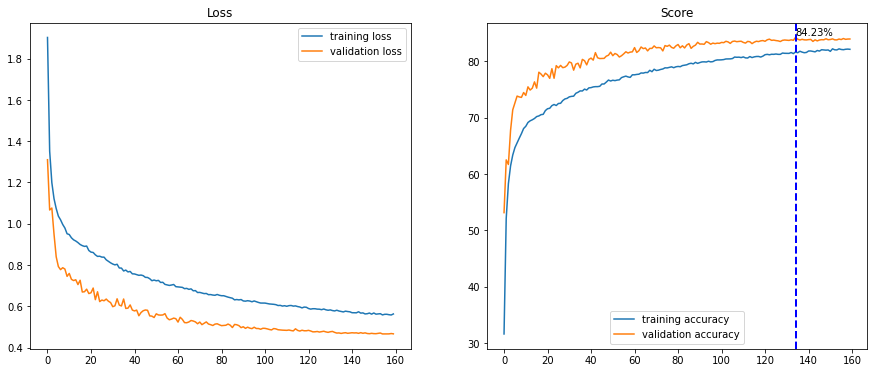

In [ ]:
test_14_merge = [[] for i in range(4)]
for i in range(4) :
    test_14_merge[i] = test_14[i] + test_14_2[i]
plot_train_valid(test_14_merge[0] ,test_14_merge[1], test_14_merge[2], test_14_merge[3])
# Batch size = 200, loss = crossentropy
# Dropout before first, second and third fully-connected-layer (0.5/0.5/0.5)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.002
# Batch normalization after first, second and third fully-connected-layer
# RandomHorizontalFlip, RandomCrop, RandomRotation을 적용한 augmented dataset을 originmal dataset에 추가하여 학습을 진행.
# Validation score가 training score 보다 높게 나왔기 때문에, Underfitting 이거나, Dropout의 영향일 수 있다. -> network를 추가하거나, 학습을 길게 시도해본다.

In [ ]:
model15 = conv_net()
model15 = model15.to(device)
model15

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 84, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=756, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(240, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (loss): CrossEntropyLoss()
)

In [ ]:
test_15 = train_eval_model_gpu(model15, 80, device, train_loader_merge, test_loader_aug)

epoch.  1 	 train_ls : 1.836891 	 train_ac : 34.4600% 	 valid_ls : 1.259557 	 valid_ac : 55.5300% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.126134 	 train_ac : 61.0160% 	 valid_ls : 0.912771 	 valid_ac : 68.7000% 	 lr : 0.00100
epoch.  5 	 train_ls : 0.986444 	 train_ac : 66.2220% 	 valid_ls : 0.764586 	 valid_ac : 73.5600% 	 lr : 0.00100
epoch.  7 	 train_ls : 0.919474 	 train_ac : 68.7090% 	 valid_ls : 0.733319 	 valid_ac : 74.6200% 	 lr : 0.00100
epoch.  9 	 train_ls : 0.877891 	 train_ac : 70.3790% 	 valid_ls : 0.694423 	 valid_ac : 76.0900% 	 lr : 0.00100
epoch. 11 	 train_ls : 0.845763 	 train_ac : 71.5370% 	 valid_ls : 0.676847 	 valid_ac : 76.8800% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.815255 	 train_ac : 72.6740% 	 valid_ls : 0.668634 	 valid_ac : 76.9700% 	 lr : 0.00090
epoch. 15 	 train_ls : 0.803272 	 train_ac : 73.1210% 	 valid_ls : 0.637733 	 valid_ac : 78.2800% 	 lr : 0.00090
epoch. 17 	 train_ls : 0.775524 	 train_ac : 74.1820% 	 valid_ls : 0.654011 	 valid_ac : 77.5800

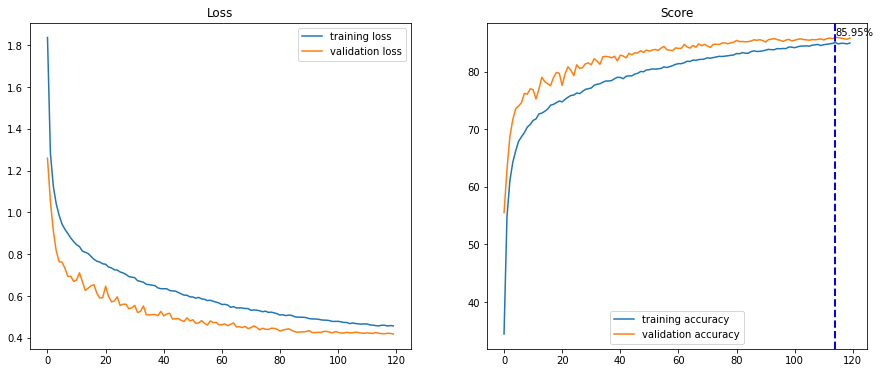

In [ ]:
test_15_merge = [[] for i in range(4)]
for i in range(4) :
    test_15_merge[i] = test_15[i] + test_15_2[i]
plot_train_valid(test_15_merge[0] ,test_15_merge[1], test_15_merge[2], test_15_merge[3])
# Batch size = 200, loss = crossentropy
# Dropout before first and third fully-connected-layer (0.5/0.5)
# Learning scheduler is ReduceLROnPlateau (lr = 0.001, patience = 1, factor = 0.9)
# Xavier initialization to fully-connected-layer
# Weight decay = 0.001
# Batch normalization after first, second and third fully-connected-layer
# Augmented dataset에 대해 Dropout layer 1개 축소, Weight decay 0.002 -> 0.001로 release model regularization
# 이전의 Training acc, Validation acc 사이의 gap이 줄어들었고, 전체적인 성능도 향상되었다.

In [135]:
temp_loader = DataLoader(train_set, batch_size = 50000, shuffle=True, num_workers=2)

In [136]:
temp_loader

In [137]:
len(temp_loader)

1

In [138]:
image, label = iter(temp_loader).next()

In [139]:
len(label)

50000

In [164]:
label.shape

torch.Size([50000])

In [140]:
len(image)

50000

In [129]:
indice = (label==1).nonzero()
indice = indice.view(-1)
rnd_idx = torch.LongTensor(np.random.choice(indice.shape[0], 50, replace = False))
choiced_indice = indice[rnd_idx]
ex_image = image[choiced_indice]

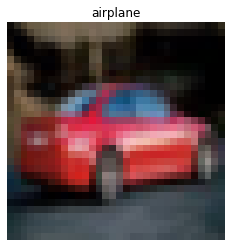

In [133]:
show_image(ex_image[5], torch.Tensor([0]))

In [208]:
def make_sampled_dataset(dataset, output_size) :
    sampling_size = output_size//10
    ret_data = torch.empty(output_size, 3, 32, 32)
    ret_label = torch.empty(output_size)
    temp_loader = DataLoader(dataset, batch_size = 50000, shuffle=True, num_workers=2)
    # len(temp_loader) = 10
    for i in range(10) :
        image, target = iter(temp_loader).next()
        # random sampling
        indice = (target==i).nonzero()
        indice = indice.view(-1)
        rnd_idx = torch.LongTensor(np.random.choice(indice.shape[0], sampling_size, replace = False))
        choiced_indice = indice[rnd_idx]
        ret_data[i*sampling_size:(i+1)*sampling_size] = image[choiced_indice]
        class_label = torch.full((sampling_size, ), i)
        ret_label[i*sampling_size:(i+1)*sampling_size] = class_label
        print('class {} completed'.format(i))
    shuffle_idx = np.random.choice(30000, 30000, replace = False)
    ret_data = ret_data[shuffle_idx]
    ret_label = ret_label[shuffle_idx]
    return ret_data, ret_label

In [ ]:
sampled_data, sampled_label = make_sampled_dataset(train_set_aug, 30000)

class 0 completed
class 1 completed
class 2 completed
class 3 completed
class 4 completed
class 5 completed
class 6 completed
class 7 completed


In [211]:
print(sampled_data.shape)
print(sampled_label.shape)

torch.Size([30000, 3, 32, 32])
torch.Size([30000])


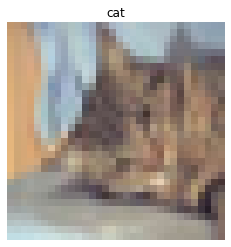

In [210]:
n_idx = 3000*9
show_image(sampled_data[n_idx], sampled_label[n_idx])

In [207]:
sampled_dataset = torch.utils.data.TensorDataset(sampled_data, sampled_label)
type(sampled_dataset)

torch.utils.data.dataset.TensorDataset

In [ ]:
train_set_merge = torch.utils.data.ConcatDataset([train_set, train_set_aug])
print(len(train_set_merge))

In [30]:
model16 = conv_net()
model16 = model16.to(device)
model16

conv_net(
  (conv1): Conv2d(3, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(36, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.5, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (dropout3): Dropout(p=0.5, inplace=False)
  (dropout4): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1152, out_features=276, bias=True)
  (fc2): Linear(in_features=276, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (batch1): BatchNorm1d(276, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch2): BatchNorm1d(84, eps=1e-05, momentum=0.1, affine=True

In [31]:
test_16 = train_eval_model_gpu(model16, 80, device, train_loader, test_loader)

epoch.  1 	 train_ls : 1.943504 	 train_ac : 30.6500% 	 valid_ls : 1.635137 	 valid_ac : 40.1000% 	 lr : 0.00100
epoch.  3 	 train_ls : 1.348951 	 train_ac : 52.1820% 	 valid_ls : 1.232218 	 valid_ac : 56.2300% 	 lr : 0.00100
epoch.  5 	 train_ls : 1.208180 	 train_ac : 57.5340% 	 valid_ls : 1.032192 	 valid_ac : 63.3600% 	 lr : 0.00100
epoch.  7 	 train_ls : 1.128770 	 train_ac : 60.7440% 	 valid_ls : 0.997585 	 valid_ac : 65.3200% 	 lr : 0.00100
epoch.  9 	 train_ls : 1.059658 	 train_ac : 63.0320% 	 valid_ls : 0.881305 	 valid_ac : 69.3700% 	 lr : 0.00100
epoch. 11 	 train_ls : 1.019531 	 train_ac : 64.7300% 	 valid_ls : 0.867014 	 valid_ac : 69.0300% 	 lr : 0.00100
epoch. 13 	 train_ls : 0.989918 	 train_ac : 65.8220% 	 valid_ls : 0.824761 	 valid_ac : 70.8000% 	 lr : 0.00100
epoch. 15 	 train_ls : 0.960868 	 train_ac : 66.9560% 	 valid_ls : 0.772359 	 valid_ac : 73.2400% 	 lr : 0.00100
epoch. 17 	 train_ls : 0.926097 	 train_ac : 68.0720% 	 valid_ls : 0.728196 	 valid_ac : 74.4800

In [46]:
model16 = model16.to('cpu')

In [65]:
def get_all_pred(model, loader) :
    all_pred = torch.Tensor([])
    all_label = torch.Tensor([])
    for batch in loader :
        image, label = batch
        pred = model.forward(image)
        _, pred = torch.max(pred, dim = 1)
        all_pred = torch.cat((all_pred, pred), dim = 0)
        all_label = torch.cat((all_label, label), dim = 0)
    return all_pred, all_label

In [66]:
model16_pred, model16_label = get_all_pred(model16, test_loader)

In [67]:
np_pred = model16_pred.numpy()
np_label = model16_label.numpy()

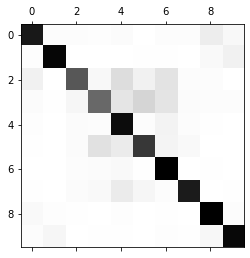

In [68]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(np_label, np_pred)
plt.matshow(cf, cmap = 'binary')
# 2 -> 4 / bird -> deer
# 3 -> 5 / cat -> dog

In [56]:
def get_dataset_added(origin_dataset, recon_ratio, src_ratio, mixup_class, normalize) :
    # mixup_class : tuple data which means what class is mixed up
    loader = DataLoader(origin_dataset, batch_size = len(origin_dataset), shuffle = False, num_workers = 4)
    # treat all dataset, make no batch and set shuffle False because we put randomness later
    # we consider origin_dataset is Tensor type data, balanced dataset and we mixup images by one-to-one following indices
    image, label = iter(loader).next()
    print('image denormalizing')
    image = (image * 0.5) + 0.5
    search_idx = []
    ret_image, ret_label = image, label


    for mixup in mixup_class :
        src_class, noise_class = mixup[0], mixup[1]
        # get src, noise indices in dataset
        src_idx = (label==src_class).nonzero().view(-1)
        noise_idx = (label==noise_class).nonzero().view(-1)

        n_src = src_idx.size()[0]
        n_noise = noise_idx.size()[0]
        n_mixup = int(n_src*recon_ratio)

        # n_src 중에서 recon_ratio 만큼의 indices를 random하게 extract
        src_apply_idx = torch.LongTensor(np.random.choice(n_src, n_mixup))
        noise_apply_idx = torch.LongTensor(np.random.choice(n_noise, n_mixup))

        # extract mixup indices by randomly, 실제 mixup이 적용되는 idx
        src_selected = src_idx[src_apply_idx]
        noise_selected = noise_idx[noise_apply_idx]

        # extract source, noise image
        src_image = image[src_selected]
        noise_image = image[noise_selected]

        # make mixup image and replace source class's original image
        mixup_image = (src_image*src_ratio) + (noise_image*(1-src_ratio))

        # mixed up image's indices in each source class, list's indices mean source class's number 
        search_idx.append(src_selected)        

        # make mixup_image's label
        mixup_label = torch.full([n_mixup], src_class, dtype=torch.int64)

        # concatenate origin_dataset and mixup_dataset
        ret_image = torch.cat([ret_image, mixup_image], dim = 0)
        ret_label = torch.cat([ret_label, mixup_label], dim = 0)
        print('add noise of class.{0} to class.{1}'.format(noise_class, src_class))
    
    shuffle_idx = np.random.choice(ret_image.size()[0], ret_image.size()[0])
    ret_image, ret_label = ret_image[shuffle_idx], ret_label[shuffle_idx]


    if normalize:
        print('image normalizing')
        ret_image = (ret_image-0.5)/0.5
    
    ret_dataset = torch.utils.data.TensorDataset(ret_image, ret_label)

    return ret_dataset, search_idx

In [58]:
mixup_dataset, _ = get_dataset_added(train_set, 0.3, 0.6, ((2, 4), (3, 5)), True)

image denormalizing
5000 5000 1500
mixup_label : 1500
mixup_image : 1500
torch.Size([51500, 3, 32, 32]) torch.Size([51500])
add noise of class.4 to class.2
5000 5000 1500
mixup_label : 1500
mixup_image : 1500
torch.Size([53000, 3, 32, 32]) torch.Size([53000])
add noise of class.5 to class.3
image normalizing
53000


In [59]:
mixup_loader = DataLoader(mixup_dataset, batch_size = 55000, shuffle = False, num_workers = 4)
len(mixup_loader)

1

In [60]:
mixup_image, mixup_label = iter(mixup_loader).next()
print(len(mixup_image), len(mixup_label))

53000 53000


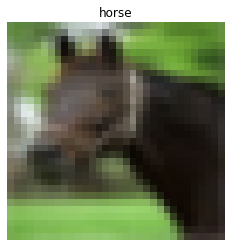

In [64]:
sample = 52501
show_image(mixup_image[sample], mixup_label[sample])

In [70]:
def show_multiple_images(data, target) :
    label_map = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    n_image = len(data)
    fig = plt.figure(figsize = (10, 8))
    for i in range(n_image) :
        image, label = data[i], target[i]
        image = image*(0.5) + 0.5
        np_img = image.numpy()
        np_img = np.transpose(np_img, (1, 2, 0))
        ax = fig.add_subplot(4, 5, i+1)
        ax.imshow(np_img)
        ax.set_title(label_map[label.item()])
        ax.axis('off')

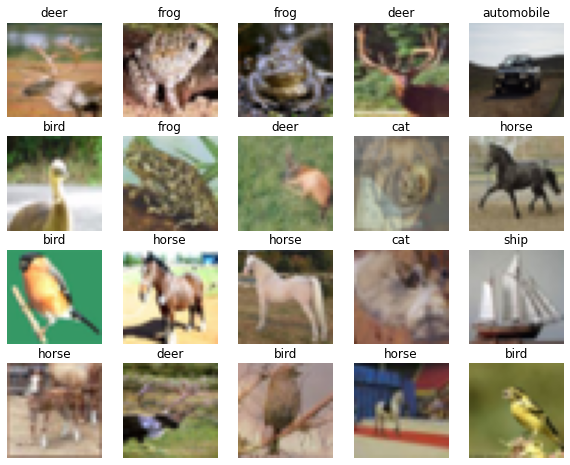

In [75]:
show_multiple_images(mixup_image[52000:52020], mixup_label[52000:52020])